# Final project on Supervised Machine Learning: Classification

## Analysis the Breast Cancer Dataset

## Introdcution and Dataset Description
### Source: 
The breast cancer dataset to be used in this analysis was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. Downloaded from the University of California (UCI) Machine Learning Repository. Link- https://archive.ics.uci.edu/ml/datasets/breast+cancer

### Description: 
The dataset includes 201 instances of benign class (non-cancerous) and 85 instances of the malignant class (Cancerous).  The instances are described by 9 attributes, some of which are linear and some are nominal. They include:


In [1]:
#First we import the basic libraries and import others as we progreee
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [2]:
#Stop all warnings
def warn(*args, **kwargs):
    pass
import warnings

warnings.warn = warn
rs =42

In [3]:
#Data import
source  = 'Datasets/breast_cancer.DATA'

#we include column names in our dataset

columns = ['Class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat']
b_df = pd.read_csv(source, header=None, names = columns)

In [4]:
b_df.head(5)

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
b_df.shape
#the dataset have 286 instances with 9 features and a target variable

(286, 10)

In [6]:
b_df.Class.unique()
#'no-recurrence-events' stands for benign while 'recurrence-events' stands for malignant

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

<AxesSubplot:>

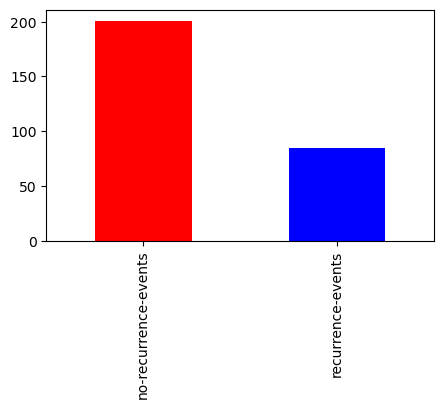

In [7]:
b_df.Class.value_counts().plot(kind = 'bar', color = ['red', 'blue'], figsize=(5,3))
#We can see that the datasets is infact imbalanced

In [107]:
b_df.Class.value_counts(normalize = True)

0    0.707581
1    0.292419
Name: Class, dtype: float64

In [8]:
b_df.dtypes
#all the attributes are of type objects excpet one ie.deg-malig

Class          object
age            object
menopause      object
tumor_size     object
inv_nodes      object
node_caps      object
deg_malig       int64
breast         object
breast_quad    object
irradiat       object
dtype: object

We need to find missing values

In [9]:
#First we search for '?'
#b_df.columns.tolist()

In [10]:
def cate(b_df):
    result = {}
    
    result['age'] = b_df.age.unique()
    result['menopause'] = b_df.menopause.unique()
    result['tumor_size'] = b_df.tumor_size.unique()
    result['inv_nodes'] = b_df.inv_nodes.unique()
    result['node_caps'] = b_df.node_caps.unique()
    result['deg_malig'] = b_df.deg_malig.unique()
    result['breast'] = b_df.breast.unique()
    result['breast_quad'] = b_df.breast_quad.unique()
    result['irradiat'] = b_df.irradiat.unique()
    
    return result

In [11]:
cate(b_df)

{'age': array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object),
 'menopause': array(['premeno', 'ge40', 'lt40'], dtype=object),
 'tumor_size': array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
        '40-44', '35-39', '5-9', '45-49'], dtype=object),
 'inv_nodes': array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
       dtype=object),
 'node_caps': array(['no', 'yes', '?'], dtype=object),
 'deg_malig': array([3, 2, 1], dtype=int64),
 'breast': array(['left', 'right'], dtype=object),
 'breast_quad': array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
       dtype=object),
 'irradiat': array(['no', 'yes'], dtype=object)}

In [12]:
missing_values_node_caps = b_df[b_df['node_caps'].isin(['?'])].index.tolist()
missing_values_node_caps

[145, 163, 164, 183, 184, 233, 263, 264]

In [13]:
missing_values_breast_quad = b_df[b_df['breast_quad'].isin(['?'])].index.tolist()
missing_values_breast_quad

[206]

In [14]:
missing_index = missing_values_node_caps + missing_values_breast_quad
print(f"Combined indices of missing values: {missing_index}")

Combined indices of missing values: [145, 163, 164, 183, 184, 233, 263, 264, 206]


In [15]:
b_df = b_df.drop(missing_index)

In [16]:
cate(b_df)

{'age': array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object),
 'menopause': array(['premeno', 'ge40', 'lt40'], dtype=object),
 'tumor_size': array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
        '40-44', '35-39', '5-9', '45-49'], dtype=object),
 'inv_nodes': array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
       dtype=object),
 'node_caps': array(['no', 'yes'], dtype=object),
 'deg_malig': array([3, 2, 1], dtype=int64),
 'breast': array(['left', 'right'], dtype=object),
 'breast_quad': array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
       dtype=object),
 'irradiat': array(['no', 'yes'], dtype=object)}

In [17]:
#then we search for NaN
b_df.isna().sum() #shows that there are no NaN present in the dataset

Class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
dtype: int64

In [18]:
#Now we perform label encoder and onehotencoder on the categorical variables 
label_encod = LabelEncoder()
#All the variables infact needs encoding of different types
b_df['age'] = label_encod.fit_transform(b_df['age'])
b_df['tumor_size'] = label_encod.fit_transform(b_df['tumor_size'])
b_df['menopause'] = label_encod.fit_transform(b_df['menopause'])
b_df['inv_nodes'] = label_encod.fit_transform(b_df['inv_nodes'])
b_df['node_caps'] = label_encod.fit_transform(b_df['node_caps'])
b_df['breast'] = label_encod.fit_transform(b_df['breast'])
b_df['breast_quad'] = label_encod.fit_transform(b_df['breast_quad'])
b_df['irradiat'] = label_encod.fit_transform(b_df['irradiat'])
#Finally the class
b_df['Class'] = label_encod.fit_transform(b_df['Class'])


In [19]:
b_df.head(5)

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0


In [20]:
cate(b_df)

{'age': array([1, 2, 4, 3, 5, 0]),
 'menopause': array([2, 0, 1]),
 'tumor_size': array([ 5,  3,  2,  0,  4, 10,  1,  7,  6,  9,  8]),
 'inv_nodes': array([0, 5, 6, 4, 2, 1, 3]),
 'node_caps': array([0, 1]),
 'deg_malig': array([3, 2, 1], dtype=int64),
 'breast': array([0, 1]),
 'breast_quad': array([1, 4, 2, 3, 0]),
 'irradiat': array([0, 1])}

In [21]:
b_df.dtypes

Class          int32
age            int32
menopause      int32
tumor_size     int32
inv_nodes      int32
node_caps      int32
deg_malig      int64
breast         int32
breast_quad    int32
irradiat       int32
dtype: object

In [22]:
b_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,277.0,0.292419,0.455697,0.0,0.0,0.0,1.0,1.0
age,277.0,2.642599,1.010125,0.0,2.0,3.0,3.0,5.0
menopause,277.0,1.093863,0.988264,0.0,0.0,2.0,2.0,2.0
tumor_size,277.0,4.068592,2.178366,0.0,3.0,4.0,5.0,10.0
inv_nodes,277.0,1.014440,1.876574,0.0,0.0,0.0,0.0,6.0
node_caps,277.0,0.202166,0.402342,0.0,0.0,0.0,0.0,1.0
deg_malig,277.0,2.057762,0.729989,1.0,2.0,2.0,3.0,3.0
breast,277.0,0.476534,0.500353,0.0,0.0,0.0,1.0,1.0
breast_quad,277.0,1.787004,1.097483,0.0,1.0,2.0,2.0,4.0
irradiat,277.0,0.223827,0.417562,0.0,0.0,0.0,0.0,1.0


In [23]:
skewness = b_df.skew()
print(skewness)

Class          0.917675
age            0.019817
menopause     -0.189562
tumor_size     0.496189
inv_nodes      1.460108
node_caps      1.491267
deg_malig     -0.089498
breast         0.094479
breast_quad    0.629747
irradiat       1.332411
dtype: float64


In [24]:
#b_df = np.sqrt(b_df)
#b_df

In [25]:
#skewness = b_df.skew()
#print(skewness)

We will be using the StratifiedShuffleSplit to initailly handle the imbalanced nature of the dataset

In [26]:
X = b_df.loc[:, b_df.columns != 'Class']
#X

In [27]:
y = b_df[['Class']]
#y

In [28]:
#checking for correlation of individual variables with the taget varaible.FETAURE SELECTION KENAN
features_corr = b_df.corr()['Class'][1:]
features_corr

age           -0.086981
menopause      0.059512
tumor_size     0.143968
inv_nodes      0.325523
node_caps      0.289002
deg_malig      0.330253
breast        -0.041304
breast_quad    0.059788
irradiat       0.226020
Name: Class, dtype: float64

In [29]:
'''
#visualizing using  a histogram
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.histplot(features_corr.abs(), bins = 50)
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');
#plt.show()
'''

"\n#visualizing using  a histogram\nimport seaborn as sns\nsns.set_context('talk')\nsns.set_style('white')\n\nfig, ax = plt.subplots(figsize = (10,6))\n\nax = sns.histplot(features_corr.abs(), bins = 50)\nax.set(xlabel='Absolute Correlation', ylabel='Frequency');\n#plt.show()\n"

In [30]:
#USING THE CHI2 for feature selection


select_chi = SelectKBest(score_func = chi2, k = 5)
select_featurs = select_chi.fit(X, y)

select_featurs = pd.DataFrame(select_featurs.scores_)
feature_columns = pd.DataFrame(X.columns)


General_table = pd.concat([feature_columns,select_featurs], axis = 1)
General_table.columns  = ['features','scores']

General_table.sort_values(by = 'scores', ascending = False)

,features,scores
3,inv_nodes,101.526045
4,node_caps,18.458456
8,irradiat,10.983249
5,deg_malig,7.795415
2,tumor_size,6.672021
1,menopause,0.872771
0,age,0.806259
7,breast_quad,0.664976
6,breast,0.247372


By using the chisquare test, we can see that inv_nodes (Number of involved lymph nodes in breast cancer patients) happens to
be the most correlated varible with the target class. Also, the age, breast_quad, and breast position has little to do with the target class

we used the stratify data spilt to  Stratification ensures
that the class proportions are preserved in both the training and testing datasets

## Creating copies of data for each classifier

In [31]:
Xlr = X.copy()
ylr = y.copy()
#for logisticRegression 

In [32]:
"""scaler =  StandardScaler()
Xlr = scaler.fit_transform(Xlr)
Xlr"""
#Applying standardscaler does not help improve accuracy

'scaler =  StandardScaler()\nXlr = scaler.fit_transform(Xlr)\nXlr'

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = rs)
X_train.shape
print('the shapes X_train is: {}\n y_train is: {}\n X_test is: {}\n y_test is: {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

the shapes X_train is: (221, 9)
 y_train is: (221, 1)
 X_test is: (56, 9)
 y_test is: (56, 1)


# Learning Algorithms

### Fitting a logistic regression model without any regularization. Also no unbalanced data handling techniques used.

In [34]:
'''def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),
             "trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}'''

'def get_accuracy(X_train, X_test, y_train, y_test, model):\n    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),\n             "trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}'

In [35]:
def get_evaluation_scores(yt, prd):
    result = {}
    result['accuracy'] = accuracy_score(yt, prd),
    result['precision'] = precision_score(yt, prd),
    result['recall'] = recall_score(yt, prd),
    result['f1'] = f1_score(yt, prd), 
    result['auc'] = roc_auc_score(yt, prd)
    
    return result

In [36]:
normal_lr = LogisticRegression(solver = 'liblinear')
normal_lr.fit(X_train, y_train)
y_pred = normal_lr.predict(X_test)

#Getting the accuracy score on train and test
#get_accuracy(X_train, X_test, y_train, y_test, normal_lr)

In [37]:

#Getting other scores
scores = get_evaluation_scores(y_test, y_pred)
scores = pd.DataFrame(scores, index = ['Normal_LR_Scores']).T
scores

,Normal_LR_Scores
accuracy,0.803571
precision,0.777778
recall,0.437500
f1,0.560000
auc,0.693750


### Using GridSearch to serach for best parameters for LogisticRegression

In [38]:
normal_lr_GS = LogisticRegression()
#normal_lr.fit(X_train, y_train)
#y_pred = normal_lr.predict(X_test)

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'class_weight': [None],
    'max_iter': [100,200,500]
}

search = GridSearchCV(estimator = normal_lr_GS, 
                      param_grid = param_grid,
                      n_jobs = -1,
                      scoring='f1'
                     )

search.fit(X_train, y_train)
y_pred = search.predict(X_test)

In [39]:
eval_ = get_evaluation_scores(y_test, y_pred)
df_grid_search = pd.DataFrame(eval_, index=['Grid-search_scores']).T
df_grid_search

,Grid-search_scores
accuracy,0.750000
precision,0.666667
recall,0.250000
f1,0.363636
auc,0.600000


In [40]:
search.best_score_ #There is a little improvement in F1 using the grid search to tune parameters 0.5730935730935732

0.4662395118230359

In [41]:
search.best_params_

{'C': 1.0,
 'class_weight': None,
 'max_iter': 500,
 'penalty': 'l1',
 'solver': 'saga'}

In [42]:
#best model
search.best_estimator_

LogisticRegression(max_iter=500, penalty='l1', solver='saga')

Now let us try to handle the imbalanced nature of the dataset.


### First using the weighting strategy with deafaul LR

In [43]:
class_weight = {0:0.2,1:0.8} # this was setermined using a gridsearch. Although not showned explicitely here.
 
'''normal_lr_weight = LogisticRegression(
    C = 0.1,
    penalty = 'l2',
    solver = 'saga',
    class_weight = class_weight,
    max_iter = 100)
'''

normal_lr_weight = LogisticRegression(solver = 'liblinear', 
                                     class_weight = class_weight)

normal_lr_weight.fit(X_train, y_train)
y_pred = normal_lr_weight.predict(X_test)

In [44]:
eval_ = get_evaluation_scores(y_test, y_pred) #there has been an Increase in F1 score 0.5283018867924528
df_weight = pd.DataFrame(eval_, index=['Weight_scores']).T
df_weight

,Weight_scores
accuracy,0.482143
precision,0.314286
recall,0.687500
f1,0.431373
auc,0.543750


In [45]:
#search.best_score_ 

### Using the Synthetic Minority Oversampling Technique (SMOTE) 

In [46]:
y.value_counts(normalize = True)

Class
0        0.707581
1        0.292419
dtype: float64

In [47]:
smote = SMOTE(random_state = rs)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [48]:
y_smote.value_counts(normalize = True)

Class
0        0.5
1        0.5
dtype: float64

Now we again train our logisticRegression using new data

In [49]:
"""normal_lr_smote = LogisticRegression(
    C = 0.1,
    penalty = 'l2',
    solver = 'saga',
    class_weight = None,
    max_iter = 100)
"""
normal_lr_smote = LogisticRegression(solver = 'liblinear')

normal_lr_smote.fit(X_smote, y_smote )
y_pred = normal_lr_smote.predict(X_test)

In [50]:
eval_ = get_evaluation_scores(y_test, y_pred)
df_smote = pd.DataFrame(eval_, index=['Smote_scores']).T
df_smote

,Smote_scores
accuracy,0.642857
precision,0.409091
recall,0.562500
f1,0.473684
auc,0.618750


### Now using the undersampling technique

In [51]:
Under_sample = RandomUnderSampler(random_state = rs)
X_under, y_under = Under_sample.fit_resample(X_train, y_train)

In [52]:
y_under.value_counts(normalize = True)

Class
0        0.5
1        0.5
dtype: float64

In [53]:
'''normal_lr_undersample = LogisticRegression(
    C = 0.1,
    penalty = 'l2',
    solver = 'saga',
    class_weight = None,
    max_iter = 100)
'''

normal_lr_undersample = LogisticRegression(solver = 'liblinear')


normal_lr_undersample.fit(X_smote, y_smote )
y_pred = normal_lr_undersample.predict(X_test)

In [54]:
eval_ = get_evaluation_scores(y_test, y_pred)
df_undersample = pd.DataFrame(eval_, index=['Undersample_scores']).T
df_undersample 

,Undersample_scores
accuracy,0.642857
precision,0.409091
recall,0.562500
f1,0.473684
auc,0.618750


## Now we concatenate the results from Normal LR, LR with gridsearchCV, LR with Weight, LR with Smote, and LR with Undersample

In [55]:
One_table = pd.concat([scores, df_grid_search, df_weight, df_smote, df_undersample ], axis = 1)
One_table

,Normal_LR_Scores,Grid-search_scores,Weight_scores,Smote_scores,Undersample_scores
accuracy,0.803571,0.750000,0.482143,0.642857,0.642857
precision,0.777778,0.666667,0.314286,0.409091,0.409091
recall,0.437500,0.250000,0.687500,0.562500,0.562500
f1,0.560000,0.363636,0.431373,0.473684,0.473684
auc,0.693750,0.600000,0.543750,0.618750,0.618750


### Fitting a DecisionTree model without any regularization. Also no unbalanced data handling techniques used.

In [56]:
normal_DT = DecisionTreeClassifier()
normal_DT.fit(X_train, y_train)
y_pred = normal_DT.predict(X_test)

In [57]:
eval_ = get_evaluation_scores(y_test, y_pred)
df_normalDT = pd.DataFrame(eval_, index=['NormalDT_Score']).T
df_normalDT

,NormalDT_Score
accuracy,0.642857
precision,0.388889
recall,0.437500
f1,0.411765
auc,0.581250


### Using GridSearch to search for best parameters for DecisionTree

In [58]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [5,10,15,20],
              'min_samples_leaf': [1,2,5],
             'class_weight': [None]}


search = GridSearchCV(estimator = normal_DT, 
                      param_grid = param_grid,
                      n_jobs = -1,
                      scoring='accuracy')

search.fit(X_train, y_train)
y_pred = search.predict(X_test)

In [59]:
search.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5}

In [60]:
eval_ = get_evaluation_scores(y_test, y_pred)
GridSearchDT = pd.DataFrame(eval_, index=['GridSearchDT_Score']).T
GridSearchDT

,GridSearchDT_Score
accuracy,0.660714
precision,0.400000
recall,0.375000
f1,0.387097
auc,0.575000


### First using the weighting strategy with the best parameters selected using gridsearch

In [61]:
#We use a grid search to find the optimal weight before building a model using the weights
param_grid = {'criterion': ['entropy'],
              'max_depth': [5],
              'min_samples_leaf': [5],
             'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}]
             }


search = GridSearchCV(estimator = normal_DT, 
                      param_grid = param_grid,
                      n_jobs = -1,
                      scoring='accuracy',
                      cv = 5)

search.fit(X_train, y_train)
y_pred = search.predict(X_test)

In [62]:
eval_ = get_evaluation_scores(y_test, y_pred)
Weighted_DT = pd.DataFrame(eval_, index=['WeightedDT_Score']).T
Weighted_DT

,WeightedDT_Score
accuracy,0.696429
precision,0.466667
recall,0.437500
f1,0.451613
auc,0.618750


In [63]:
search.best_estimator_

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5)

In [64]:
search.best_score_

0.6377777777777778

In [65]:
search.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5}

### Now we build a DeciosionTree Model with the optimal weights

In [66]:
class_weight = {0:0.1, 1:0.9} # this was determined using a gridsearch. As show above.
#All other parameters remains default

'''WeightedDT = DecisionTreeClassifier(random_state=rs,
                                   class_weight = class_weight,
                                   criterion='entropy',
                                    max_depth=15,
                                   min_samples_leaf = 1)'''

WeightedDT = DecisionTreeClassifier(random_state=rs,
                                   class_weight = class_weight,
                                   )

WeightedDT.fit(X_train, y_train)
y_pred = WeightedDT.predict(X_test)

In [67]:
eval_ = get_evaluation_scores(y_test, y_pred)
Weighted_DT = pd.DataFrame(eval_, index=['WeightedDT_Score']).T
Weighted_DT

,WeightedDT_Score
accuracy,0.660714
precision,0.400000
recall,0.375000
f1,0.387097
auc,0.575000


### Using the Synthetic Minority Oversampling Technique (SMOTE) 

In [68]:
smote = SMOTE(random_state = rs)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [69]:
y.value_counts(normalize = True)

Class
0        0.707581
1        0.292419
dtype: float64

In [70]:
y_smote.value_counts(normalize = True)

Class
0        0.5
1        0.5
dtype: float64

In [71]:
SmoteDT = DecisionTreeClassifier(random_state=rs)

SmoteDT.fit(X_smote, y_smote)
y_pred = SmoteDT.predict(X_test)

In [72]:
eval_ = get_evaluation_scores(y_test, y_pred)
SMOTE_DT = pd.DataFrame(eval_, index=['SMOTE_DT_Score']).T
SMOTE_DT

,SMOTE_DT_Score
accuracy,0.696429
precision,0.461538
recall,0.375000
f1,0.413793
auc,0.600000


### Now using the undersampling technique

In [73]:
Under_sample = RandomUnderSampler(random_state = rs)
X_under, y_under = Under_sample.fit_resample(X_train, y_train)

In [74]:
y_under.value_counts(normalize = True)

Class
0        0.5
1        0.5
dtype: float64

In [75]:
UnderDT = DecisionTreeClassifier(random_state=rs)

UnderDT.fit(X_under, y_under)
y_pred = UnderDT.predict(X_test)

In [76]:
eval_ = get_evaluation_scores(y_test, y_pred)
Under_DT = pd.DataFrame(eval_, index=['Under_DT_Score']).T
Under_DT

,Under_DT_Score
accuracy,0.482143
precision,0.275862
recall,0.500000
f1,0.355556
auc,0.487500


## Now we concatenate the results from Normal DT, DT with gridsearchCV, DT with Weight, DT with Smote, and DT with Undersample

In [77]:
GeneralTable = pd.concat([df_normalDT, GridSearchDT, Weighted_DT, SMOTE_DT, Under_DT], axis = 1)
GeneralTable

,NormalDT_Score,GridSearchDT_Score,WeightedDT_Score,SMOTE_DT_Score,Under_DT_Score
accuracy,0.642857,0.660714,0.660714,0.696429,0.482143
precision,0.388889,0.400000,0.400000,0.461538,0.275862
recall,0.437500,0.375000,0.375000,0.375000,0.500000
f1,0.411765,0.387097,0.387097,0.413793,0.355556
auc,0.581250,0.575000,0.575000,0.600000,0.487500


### Fitting a RandomForest ensemble model without any regularization. Also no unbalanced data handling techniques used.

In [78]:
normal_RF =  RandomForestClassifier(random_state = rs)

normal_RF.fit(X_train, y_train.values.ravel())
y_pred = normal_RF.predict(X_test)

In [79]:
eval_ = get_evaluation_scores(y_test, y_pred)
Normal_RF = pd.DataFrame(eval_, index=['Normal_RF_Score']).T
Normal_RF

,Normal_RF_Score
accuracy,0.785714
precision,0.666667
recall,0.500000
f1,0.571429
auc,0.700000


### Using GridSearch to search for best parameters for RandomForest

In [80]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)], #uses odd numbers alone
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"],
             'class_weight': [None]}

search = GridSearchCV(estimator = normal_RF, 
                      param_grid = param_grid,
                      n_jobs = -1,
                      scoring='accuracy')

search.fit(X_train, y_train.values.ravel())
y_pred = search.predict(X_test)

C:\Users\ISUWA JEREMIAH\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [81]:
search.best_params_

{'class_weight': None,
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 11}

In [82]:
eval_ = get_evaluation_scores(y_test, y_pred)
GridSearch_RF = pd.DataFrame(eval_, index=['GridSearch_RF_Score']).T
GridSearch_RF

,GridSearch_RF_Score
accuracy,0.785714
precision,0.666667
recall,0.500000
f1,0.571429
auc,0.700000


### First using the weighting strategy with the best parameters selected using gridsearch

In [83]:
#We use a grid search to find the optimal weight before building a model using the weights
param_grid = {'n_estimators': [11],
              'max_depth': [5],
              'min_samples_leaf': [5],
             'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}],
              'max_features': ['sqrt']
             }


search = GridSearchCV(estimator = normal_RF, 
                      param_grid = param_grid,
                      n_jobs = -1,
                      scoring='accuracy',
                      cv = 5)

search.fit(X_train, y_train.values.ravel())
y_pred = search.predict(X_test)

In [84]:
eval_ = get_evaluation_scores(y_test, y_pred)
Weighted_RF = pd.DataFrame(eval_, index=['Weighted_RF_Score']).T
Weighted_RF

,Weighted_RF_Score
accuracy,0.678571
precision,0.444444
recall,0.500000
f1,0.470588
auc,0.625000


In [85]:
search.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 11}

### Now we build a RandomForest Model with the optimal weights

In [86]:
class_weight = {0: 0.3, 1: 0.7}

Weighted_RF =  RandomForestClassifier(random_state = rs,
                                   class_weight = class_weight)

Weighted_RF.fit(X_train, y_train.values.ravel())
y_pred = Weighted_RF.predict(X_test)

In [87]:
eval_ = get_evaluation_scores(y_test, y_pred)
Weighted_RF = pd.DataFrame(eval_, index=['Weighted_RF_Score']).T
Weighted_RF

,Weighted_RF_Score
accuracy,0.785714
precision,0.700000
recall,0.437500
f1,0.538462
auc,0.681250


### Using the Synthetic Minority Oversampling Technique (SMOTE) 

In [88]:
Smote_RF = RandomForestClassifier(random_state=rs)

Smote_RF.fit(X_smote, y_smote.values.ravel())
y_pred = Smote_RF.predict(X_test)

In [89]:
eval_ = get_evaluation_scores(y_test, y_pred)
SMOTE_RF = pd.DataFrame(eval_, index=['SMOTE_RF_Score']).T
SMOTE_RF

,SMOTE_RF_Score
accuracy,0.696429
precision,0.466667
recall,0.437500
f1,0.451613
auc,0.618750


### Now using the undersampling technique

In [90]:
UnderRF = RandomForestClassifier(random_state=rs)

UnderRF.fit(X_under, y_under.values.ravel())
y_pred = UnderRF.predict(X_test)

In [91]:
eval_ = get_evaluation_scores(y_test, y_pred)
Under_RF = pd.DataFrame(eval_, index=['Under_RF_Score']).T
Under_RF

,Under_RF_Score
accuracy,0.660714
precision,0.434783
recall,0.625000
f1,0.512821
auc,0.650000


## Now we concatenate the results from Normal RF, RF with gridsearchCV, RF with Weight, RF with Smote, and RF with Undersample

In [92]:
General_Table = pd.concat([Normal_RF,GridSearch_RF,Weighted_RF,SMOTE_RF,Under_RF], axis = 1)
General_Table

,Normal_RF_Score,GridSearch_RF_Score,Weighted_RF_Score,SMOTE_RF_Score,Under_RF_Score
accuracy,0.785714,0.785714,0.785714,0.696429,0.660714
precision,0.666667,0.666667,0.700000,0.466667,0.434783
recall,0.500000,0.500000,0.437500,0.437500,0.625000
f1,0.571429,0.571429,0.538462,0.451613,0.512821
auc,0.700000,0.700000,0.681250,0.618750,0.650000


## Finally, we employ the StackingClassifier for our trained models. We select from each category, the best model

### The normal LR, DT & RF consistently acheived best result in all categories. Therefore, we use them in this section. SVC is used as the meta classifier

In [93]:
'''estimators = [('LR', normal_lr),
              ('DT', df_normalDT),
              ('RF', Normal_RF)] '''


estimators = [('LR', LogisticRegression(solver = 'liblinear')),
              ('DT', DecisionTreeClassifier()),
              ('RF', RandomForestClassifier(random_state = rs))]


final_estimator = SVC(random_state = 42)

In [94]:
'''param_grid = {'DT__max_depth': [None],
              'DT__random_state':[None],
              }'''

"param_grid = {'DT__max_depth': [None],\n              'DT__random_state':[None],\n              }"

In [95]:
from sklearn.ensemble import VotingClassifier
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)
#VC = VotingClassifier(estimators, voting = 'soft')

In [96]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [97]:
eval_ = get_evaluation_scores(y_test, y_pred)
Under_RF = pd.DataFrame(eval_, index=['StackingClassifier_Score']).T
Under_RF

,StackingClassifier_Score
accuracy,0.767857
precision,0.714286
recall,0.312500
f1,0.434783
auc,0.631250


### Lets demonstrate using the default random forest as a black_box model to check for feature importance

In [98]:
'''normal_RF =  RandomForestClassifier(random_state = rs)

normal_RF.fit(X_train, y_train.values.ravel())
y_pred = normal_RF.predict(X_test)
'''

normal_RF

RandomForestClassifier(random_state=42)

####  Permutation Feature Importance

In [99]:
feature_importance = permutation_importance(estimator = normal_RF,
                                           X = X_train,
                                           y = y_train,
                                           n_repeats = 5,
                                           random_state = rs,
                                           n_jobs = -1)

In [100]:
feature_importance.importances.shape

(9, 5)

In [101]:
feature_importance.importances  

array([[0.08597285, 0.0678733 , 0.0678733 , 0.07692308, 0.07239819],
       [0.05429864, 0.04977376, 0.04977376, 0.0678733 , 0.04524887],
       [0.13122172, 0.1040724 , 0.10859729, 0.12669683, 0.12669683],
       [0.08597285, 0.09049774, 0.09502262, 0.09502262, 0.09502262],
       [0.03167421, 0.04072398, 0.0361991 , 0.02714932, 0.02714932],
       [0.15384615, 0.15384615, 0.10859729, 0.15384615, 0.15837104],
       [0.08597285, 0.06334842, 0.05429864, 0.06334842, 0.06334842],
       [0.07239819, 0.06334842, 0.07239819, 0.08597285, 0.1040724 ],
       [0.05882353, 0.04524887, 0.0361991 , 0.04977376, 0.05882353]])

In [102]:
sorted_mean = feature_importance.importances_mean
sorted_mean

array([0.07420814, 0.05339367, 0.11945701, 0.09230769, 0.03257919,
       0.14570136, 0.06606335, 0.07963801, 0.04977376])

In [103]:
sorted_idx = feature_importance.importances_mean.argsort()

In [104]:
sorted_idx

array([4, 8, 1, 6, 0, 7, 3, 2, 5], dtype=int64)

In [105]:
#Visualizing the importance
def visualize_feature_importance(importance_array):
    #sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots(figsize = (16,10))
    #fig, ax = plt.subplots()
    #fig.set_figwidth(16)
    #fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
              vert=False,
              labels = X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)", fontsize = 15)
    plt.show()
    

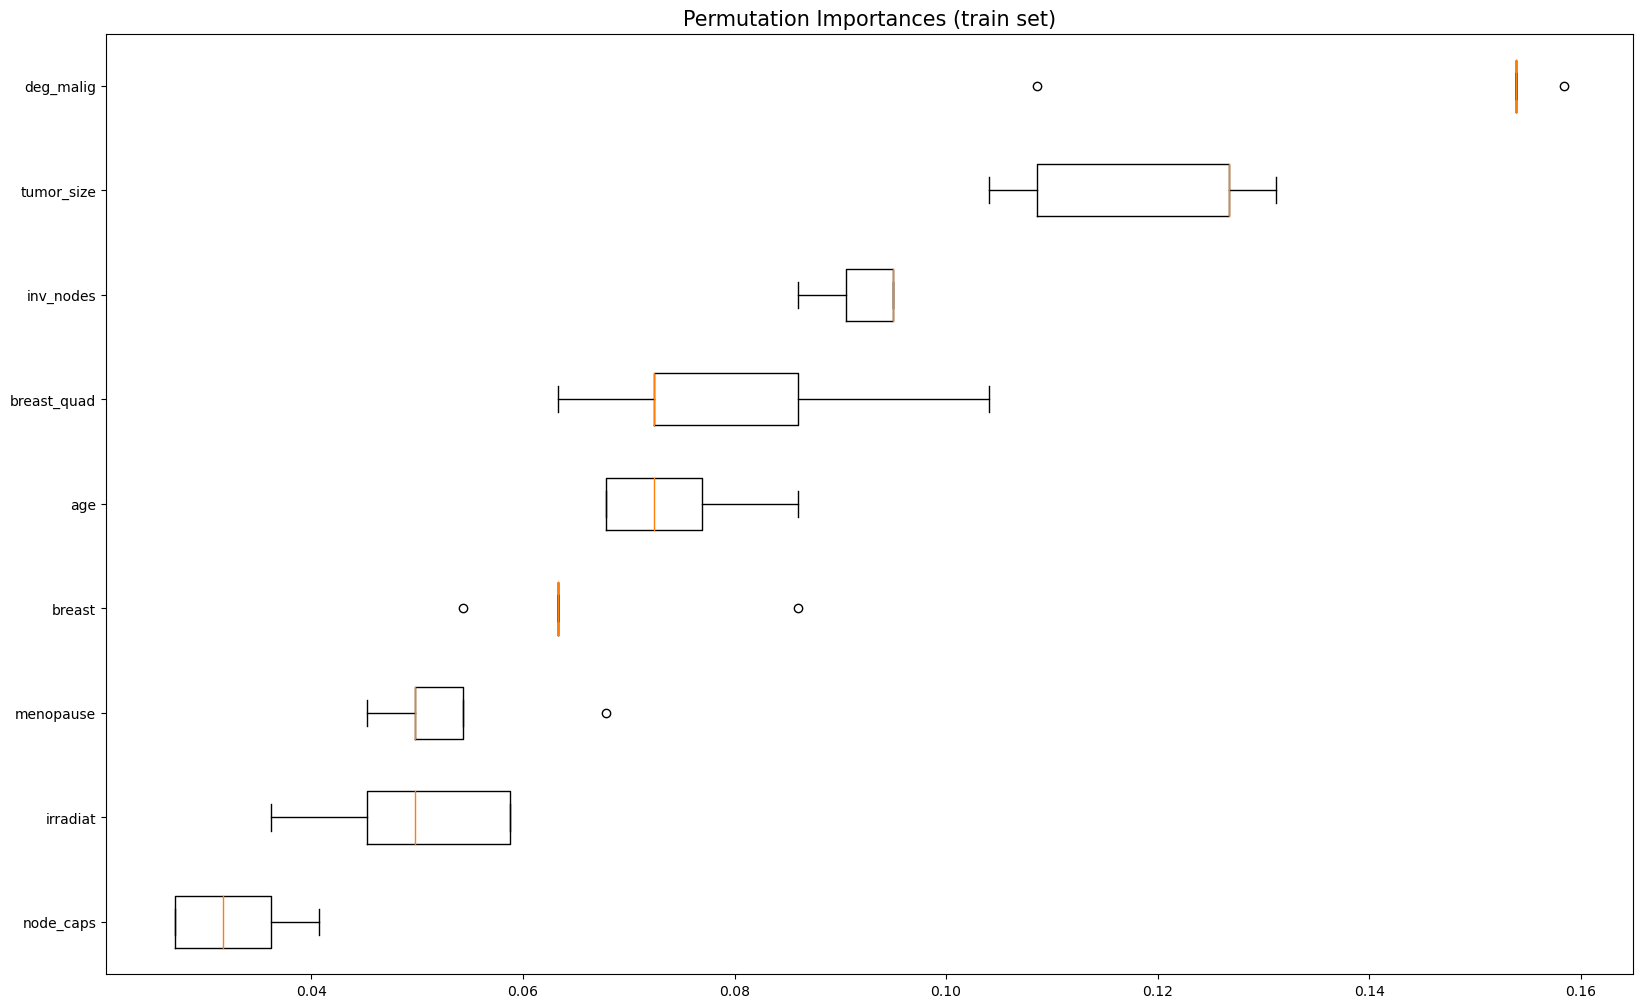

In [106]:
visualize_feature_importance(feature_importance)

# End of Project